In [7]:
import numpy as np
import matplotlib.pyplot as plt


In [45]:
T = 1000 # convert time in seconds into total samples
dt=0.1
params = {
    'rs':[0.02, 0.2, -65, 8],
    'ib':[0.02,0.2,-55, 4],
    'fs':[0.1,0.2,-65,2],
    'lts':[0.02,0.25,-65,2]
}
params['rs']

[0.02, 0.2, -65, 8]

In [46]:
# code for an izhekivich chattering neuron
def run(I, a = 0.02, b = 0.2, c = -55, d = 4,dt=0.1):
    T = len(I)
    ######### Constants
    spike_value = 35                            # Maximal Spike Value

    ######### Experimental Setup
    # VOLTAGE
    V               =   np.zeros(int(T))     # array for saving voltage history
    V[0]            =   -70                     # set initial to resting potential
    # RECOVERY
    u               =   np.zeros(int(T))     # array for saving Recovery history
    u[0]            =   -14
    
    spikes = []

    for t in range(1, T):
        # if we still didnt reach spike potential
        if V[t-1] < spike_value:
            # ODE for membrane potential
            dV      = (0.04 * V[t-1] + 5) * V[t-1] + 140 - u[t-1]
            V[t]    = V[t-1] + (dV + I[t-1]) * dt
            # ODE for recovery variable
            du      = a * (b * V[t-1] - u[t-1])
            u[t]    = u[t-1] + du * dt
        # spike reached!
        else:
            V[t-1] = spike_value    # set to spike value
            V[t] = c                # reset membrane voltage
            u[t] = u[t-1] + d       # reset recovery
            spikes.append((t-1)*dt)
    
    return V, spikes

[3.0, 84.5, 165.4, 245.9, 326.20000000000005, 406.40000000000003, 486.6, 566.8000000000001, 647.0, 727.3000000000001, 807.9000000000001, 923.9000000000001]


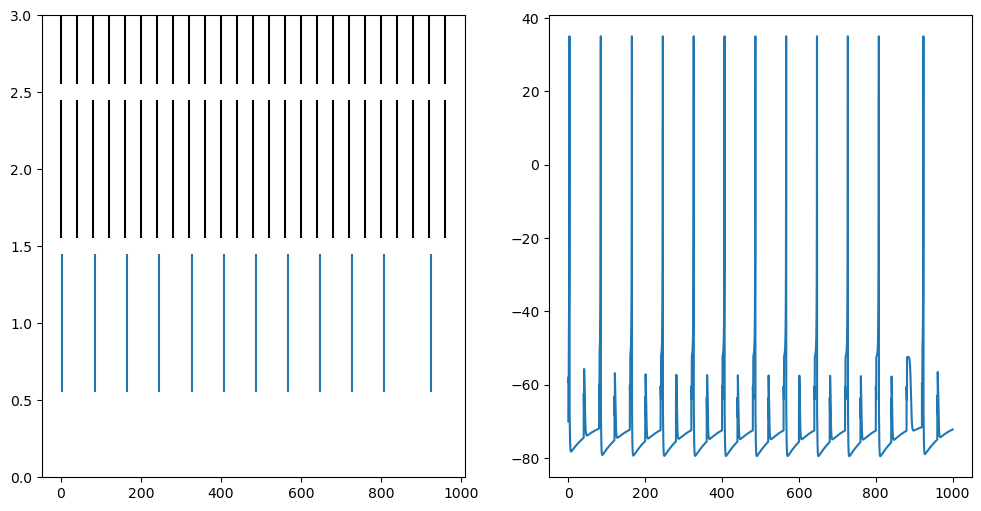

In [95]:
# I will similuate regularly spaces psps
dt=0.1
psp_amp = 120
inputs = 2
I = np.zeros((inputs,int(T/dt)))
spik_fr = 40
I[0,::int(spik_fr/dt)] =psp_amp
I[1,10::int(spik_fr/dt)] =psp_amp
events1 = np.where(I[0,...]==psp_amp)[0]
events2 = np.where(I[1,...]==psp_amp)[0]
# print(np.sum(I,axis=0))
V, spikes = run(np.sum(I,axis=0),*params['rs'],dt=dt)
print(spikes)


%matplotlib inline
fix,ax = plt.subplot_mosaic('AB',figsize=(12,6))
ax['A'].scatter(events1*dt,2*np.ones_like(events1),marker='|',s=10000,color='black')
ax['A'].scatter(events2*dt,3*np.ones_like(events2),marker='|',s=10000,color='black')
ax['A'].scatter(spikes, np.ones_like(spikes),marker='|',s=10000)
ax['A'].set_ylim(0,3)
ylabels = ['input', 'nrn response']

ax['B'].plot(np.arange(0,T,dt),V)
# plt.set_ylabels([1,2],ylabels)
plt.show()

[8.6]


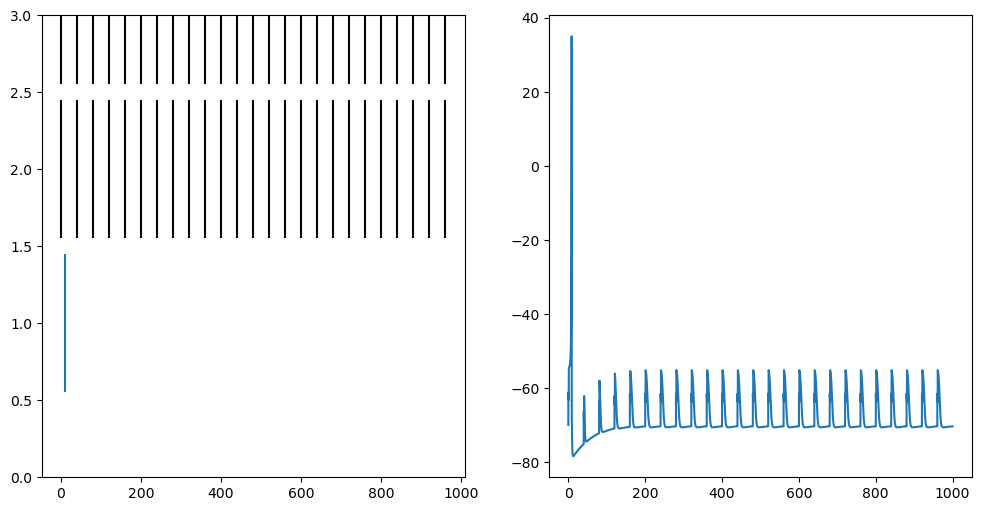

In [76]:
# I will similuate regularly spaces psps
dt=0.1
psp_amp = 88
inputs = 2
I = np.zeros((inputs,int(T/dt)))
spik_fr = 40
I[0,::int(spik_fr/dt)] =psp_amp
I[1,10::int(spik_fr/dt)] =psp_amp
events1 = np.where(I[0,...]==psp_amp)[0]
events2 = np.where(I[1,...]==psp_amp)[0]
# print(np.sum(I,axis=0))
V, spikes = run(np.sum(I,axis=0),*params['rs'],dt=dt)
print(spikes)


%matplotlib inline
fix,ax = plt.subplot_mosaic('AB',figsize=(12,6))
ax['A'].scatter(events1*dt,2*np.ones_like(events1),marker='|',s=10000,color='black')
ax['A'].scatter(events2*dt,3*np.ones_like(events2),marker='|',s=10000,color='black')
ax['A'].scatter(spikes, np.ones_like(spikes),marker='|',s=10000)
ax['A'].set_ylim(0,3)
ylabels = ['input', 'nrn response']

ax['B'].plot(np.arange(0,T,dt),V)
# plt.set_ylabels([1,2],ylabels)
plt.show()

In [ ]:
# 120 is the magic psp size, such that a spike will most likely occur within a window of 10ms 

In [324]:
# I will similuate regularly spaces psps
psp_amp = 80
inputs = 2
I = np.zeros((inputs,int(T/dt)))
I[0,::400] =psp_amp
I[1,::400] =psp_amp
events1 = np.where(I[0,...]==psp_amp)[0]
events2 = np.where(I[1,...]==psp_amp)[0]
# print(np.sum(I,axis=0))
V, spikes = run(np.sum(I,axis=0),*params['rs'])
print(spikes)


%matplotlib qt
fix,ax = plt.subplot_mosaic('AB',figsize=(12,6))
ax['A'].scatter(events1,2*np.ones_like(events1),marker='|',s=10000,color='black')
ax['A'].scatter(events2,3*np.ones_like(events2),marker='|',s=10000,color='black')
ax['A'].scatter(spikes, np.ones_like(spikes),marker='|',s=10000)
ax['A'].set_ylim(0,3)
ylabels = ['input', 'nrn response']

ax['B'].plot(V)
# plt.set_ylabels([1,2],ylabels)
plt.show()

[1, 401, 801]


Okay...
So these figures show that izhikevich neurons will spike with different delays depending on the amplitude of the incoming signal. So a psp that just barely causes a spike, may cause a spike 10 ms after stimulus presentation, whereas a strong spike will cause instant depolarization.

I'd like to see how big of a distribution these delays have with a poisson spike train of equally weights psps, a constant firing rate of randomly weighted psps, and then a poisson spike train of randomly weighted psps...

In [302]:
T=1000
av_spikes = 3
poiss_input = np.random.randint(0,99,int(T/dt)) 
poiss_input[poiss_input>av_spikes]=0
poiss_input[poiss_input!=0]=1

In [303]:
# I will similuate regularly spaces psps
psp_amp = 20
inputs = 2
I = poiss_input*psp_amp
events = np.where(I!=0)[0]
V, spikes = run(I,*params['rs'])
print(spikes)


    


%matplotlib qt
fix,ax = plt.subplot_mosaic('ABC',figsize=(12,6))
ax['A'].scatter(events,2*np.ones_like(events),marker='|',s=10000,color='black')
ax['A'].scatter(spikes, np.ones_like(spikes),marker='|',s=10000)
ax['A'].set_ylim(0,3)
ylabels = ['input', 'nrn response']

ax['B'].plot(V)

window = (-20, 21)
for spike in spikes:
    if spike>=20 and spike+20<len(V):
        plt.plot(np.arange(*window),V[spike+window[0]:spike+window[1]],color='black',alpha=0.5)
#     plt.plot(np.arange(*window),V[np.max(0,spike+window[0]):np.min(len(V),spikes+window[1])])
    
plt.show()
    
ax['C']
# plt.set_ylabels([1,2],ylabels)
plt.show()

[95, 197, 295, 469, 588, 673, 752, 841, 935, 1032, 1155, 1272, 1377, 1449, 1543, 1685, 1792, 1895, 2026, 2093, 2189, 2279, 2344, 2448, 2529, 2621, 2720, 2806, 2964, 3056, 3146, 3251, 3343, 3434, 3541, 3720, 3817, 3928, 4034, 4118, 4227, 4314, 4406, 4517, 4601, 4699, 4797, 4895, 4969, 5024, 5124, 5210, 5299, 5393, 5433, 5530, 5637, 5659, 5792, 5886, 6000, 6148, 6234, 6332, 6419, 6531, 6669, 6815, 6933, 7029, 7138, 7173, 7363, 7477, 7556, 7666, 7770, 7943, 8096, 8209, 8314, 8391, 8497, 8617, 8736, 8839, 8910, 8997, 9082, 9189, 9338, 9371, 9610, 9731, 9809, 9912]


In [282]:
np.arange(-20,21)

array([-20, -19, -18, -17, -16, -15, -14, -13, -12, -11, -10,  -9,  -8,
        -7,  -6,  -5,  -4,  -3,  -2,  -1,   0,   1,   2,   3,   4,   5,
         6,   7,   8,   9,  10,  11,  12,  13,  14,  15,  16,  17,  18,
        19])